In [63]:
import sys
from PIL import Image


In [185]:
!ls
im = Image.open("k2.jpeg")
im_feather = Image.open("art-deco-feather-gone-crazy.png")

LICENSE                               feather.png
README.md                             first-script.sh
Triangles.ipynb                       flat-grid.png
Untitled.ipynb                        gradient-curves.png
art-deco-feather-gone-crazy.png       k2.jpeg
art-deco-feather-with-cap.png         multi-taper-1.png
art-deco-feather-with-multi-taper.png multi-taper-two-levels.png
art-deco-feather-with-taper.png       multi-taper.png
art-deco-feather.png                  rectangle.png
cairo experiments.ipynb               taper-1.png
example.png                           taper-2.png
feather                               weird-little-christmas-tree


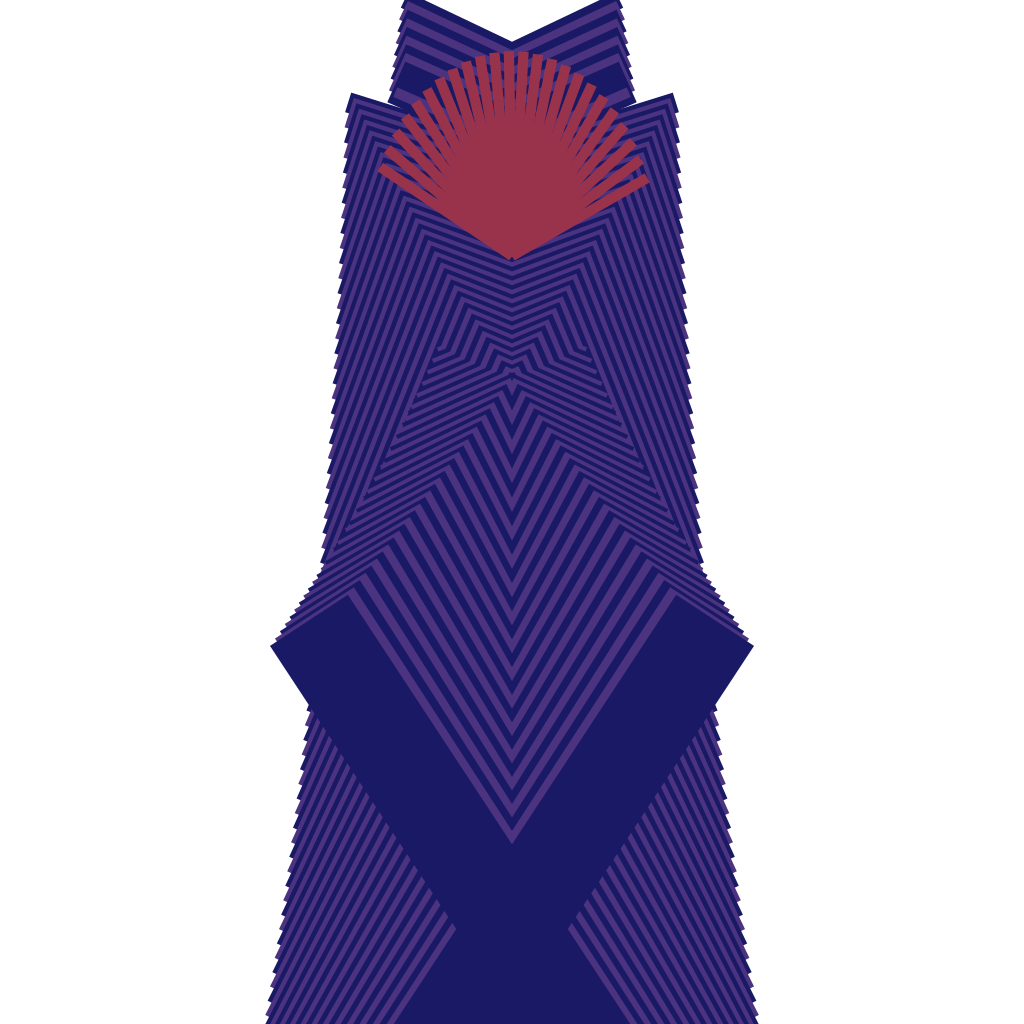

In [186]:
im_feather

In [79]:
print(im.format, im.size, im.mode)

JPEG (1600, 1200) RGB


In [80]:
# make white into transparent
"""
imgnp = np.array(im)

white = np.sum(imgnp[:,:,:3], axis=2)
white_mask = np.where(white == 255*3, 1, 0)

alpha = np.where(white_mask, 0, imgnp[:,:,-1])

imgnp[:,:,-1] = alpha 

imt = Image.fromarray(np.uint8(imgnp))
imt
"""

'\nimgnp = np.array(im)\n\nwhite = np.sum(imgnp[:,:,:3], axis=2)\nwhite_mask = np.where(white == 255*3, 1, 0)\n\nalpha = np.where(white_mask, 0, imgnp[:,:,-1])\n\nimgnp[:,:,-1] = alpha \n\nimt = Image.fromarray(np.uint8(imgnp))\nimt\n'

In [81]:

im.size

(1600, 1200)

In [82]:
mindim = min(im.size); 
mindim

1200

In [95]:
tile_size = mindim // 8
print(tile_size)

150


In [187]:

def split_into_tiles(im, tile_size):
    tiles = []
    print(im.size)
    for i in range(0, im.size[0], tile_size):
        for j in range(0, im.size[1], tile_size):
            if i + tile_size > im.size[0] or j + tile_size > im.size[1]:
                continue
            region = im.crop((i, j, i + tile_size, j + tile_size))
            
            tiles.append(region)
    return tiles

tiles = split_into_tiles(im, tile_size)
tiles_feather = split_into_tiles(im_feather, tile_size)

(1600, 1200)
(1024, 1024)


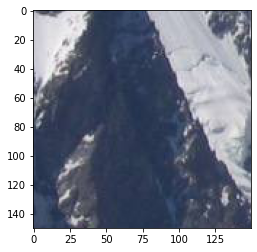

In [97]:
%matplotlib inline
imshow(tiles[13])

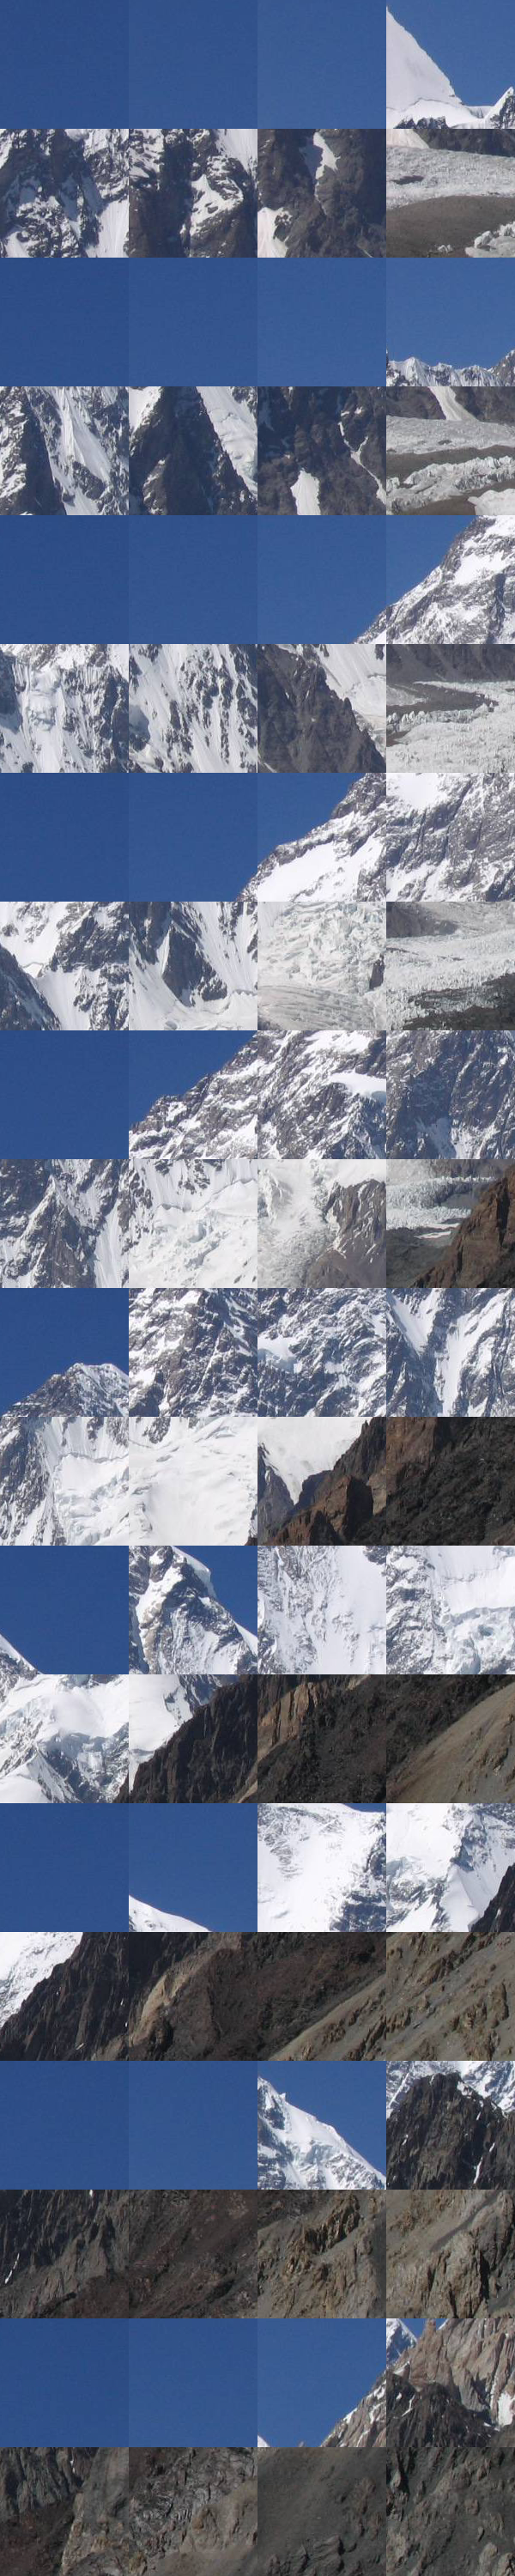

In [99]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGBA', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
image_grid(tiles, len(tiles)//4, 4)

In [101]:
imgnp = np.array(im)

In [104]:
import colorthief

In [121]:
color_thief = colorthief.ColorThief("k2.jpeg")
palette = color_thief.get_palette(color_count=10)

In [122]:
palette

[(66, 88, 129),
 (210, 211, 218),
 (43, 42, 43),
 (141, 141, 149),
 (71, 69, 72),
 (163, 172, 182),
 (115, 132, 152),
 (154, 162, 196),
 (172, 156, 154)]

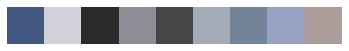

In [123]:

palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette);
plt.axis('off');
plt.show();

In [154]:
%matplotlib inline

def combine_tiles_down(x, y):
    assert x.size == y.size
    new_tile = x.copy()
    arr_x = np.array(x)
    arr_y = np.array(y)
    arr_new = np.array(new_tile)

    for i in range(new_tile.size[0]):
        for j in range(new_tile.size[1]):
            if i > j: 
                continue
            arr_new[i, j] = arr_y[i, j]
    return Image.fromarray(np.uint8(arr_new))

def combine_tiles_up(x, y):
    assert x.size == y.size
    new_tile = x.copy()
    arr_x = np.array(x)
    arr_y = np.array(y)
    arr_new = np.array(new_tile)
    ni, nj = new_tile.size
    for i in range(ni):
        for j in range(nj):
            if i < (nj - j): 
                continue
            arr_new[i, j] = arr_y[i, j]
    return Image.fromarray(np.uint8(arr_new))

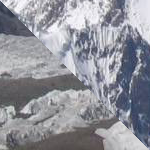

In [155]:
combine_tiles_down(tiles[15], tiles[20])

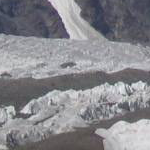

In [156]:
tiles[15]

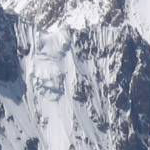

In [158]:
tiles[20]

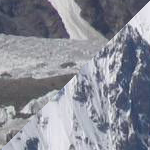

In [157]:
combine_tiles_up(tiles[15], tiles[20])

In [162]:
pattern = np.array([
    [1, 1/2, 2/1],
    [2, 1/2, 2/1]
])
print(pattern)

[[1.  0.5 2. ]
 [2.  0.5 2. ]]


(450, 300)
(150, 150)


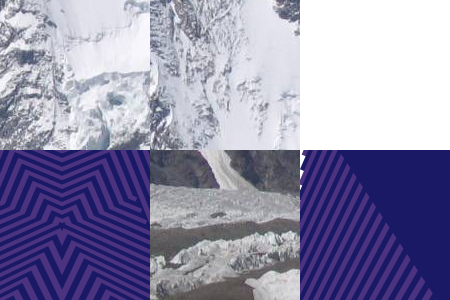

In [194]:
import PIL
def stitch_pattern(pattern, x_tiles, y_tiles):
    num_rows, num_cols = pattern.shape
    tile_size_x, tile_size_y = x_tiles[0].size
    result = PIL.Image.new("RGBA", (num_cols * tile_size_y, num_rows * tile_size_x), color=0)
    for i, row_pattern in enumerate(pattern):
        for j, col_pattern in enumerate(row_pattern):
            x_tile = x_tiles[np.random.randint(len(x_tiles))]
            y_tile = y_tiles[np.random.randint(len(y_tiles))]
            if col_pattern == 1.0:
                region = x_tile
            elif col_pattern == 2.0:
                region = y_tile
            elif col_pattern == 0.5:
                
                region = x_tile #combine_tiles_up(x_tile, y_tile)
            else:
                region = y_tiles # combine_tiles_down(x_tile, y_tile)
                
            result.paste(region, (tile_size_y * j, tile_size_x * i, tile_size_y * (j + 1), tile_size_x * (i + 1), ))
            
    return result
                           
result = stitch_pattern(pattern, tiles, tiles_feather)
print(result.size)
print(tiles[0].size)
result

In [192]:
tiles[0].size

(150, 150)